In [2]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_regression 
%matplotlib inline

/Users/twff/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2.1 Feature Normalization

### 2.2 Gradient Descent Setup

In [3]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    mins_train = np.min(train, axis=0)
    maxs_train = np.max(train, axis=0)
    rng_train = maxs_train - mins_train
    train_normalized = (train-mins_train)/rng_train
    
    mins_test = np.min(test, axis=0)
    maxs_test = np.max(test, axis=0)
    rng_test = maxs_test - mins_test
    test_normalized = (test-mins_test)/rng_test
    return train_normalized, test_normalized

In [43]:

    #Loading the dataset
print('loading the dataset')
    
df = pd.read_csv('hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [46]:
print('loading the dataset')
    
df = pd.read_csv('hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.full((X_train.shape[0], 1),10)))  # Add bias term
X_test = np.hstack((X_test, np.full((X_test.shape[0], 1),10))) # Add bias term

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


/Users/twff/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((100, 1), 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


the minimum test loss is nan
the minimum train loss is nan


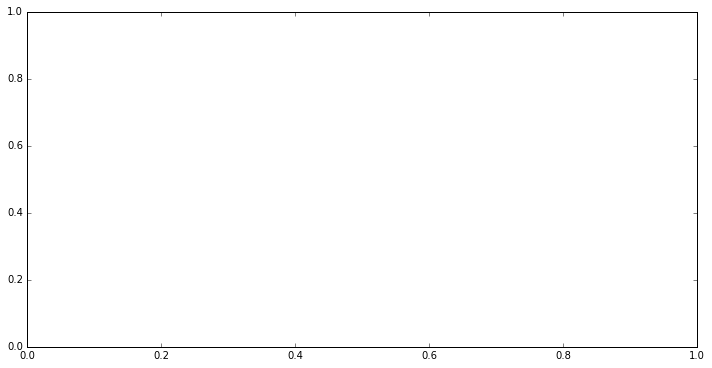

In [47]:
lamb = np.linspace(1e-7, 0.1, 100)
plt.figure(figsize = (12, 6))
J_train = np.zeros(len(lamb))
J_test = np.zeros(len(lamb))
thetas = np.zeros((len(lamb),X_train.shape[1]))
axes = plt.gca()
for i in range(len(lamb)):
    theta, _ = regularized_grad_descent(X_train, y_train, alpha=0.1, lambda_reg = lamb[i], num_iter=1000)
    thetas[i] = theta[-1]
    J_train[i] = compute_square_loss(X_train, y_train, thetas[i])
    J_test[i] = compute_square_loss(X_test, y_test, thetas[i])

print('the minimum test loss is {}'.format(min(J_test)))
print('the minimum train loss is {}'.format(min(J_train)))

#### 1.
the matrix expression of $J()$ is:
$$J()=

#### 5.

In [5]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    m = X.shape[0]
    loss = 0 #initialize the square_loss
    hypothesis = np.dot(X, theta)
    loss = hypothesis - y
    loss = np.sum(loss ** 2)/(2*m)
    return loss

In [6]:
theta = np.ones(X.shape[1])
compute_square_loss(X, y, theta)

326.12774127212788

#### 6.

In [9]:
### compute the gradient of square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    hypothesis = np.dot(X, theta)
    loss = hypothesis - y
    gradient = np.dot(X.transpose(), loss)/len(y)
    return gradient
    

In [10]:
compute_square_loss_gradient(X_train, y_train, theta)

ValueError: shapes (100,49) and (48,) not aligned: 49 (dim 1) != 48 (dim 0)

### 2.3

In [11]:
def compute_point_loss(X, y, theta):
    m = X.shape[0]
    loss = 0 #initialize the square_loss
    hypothesis = np.dot(X, theta)
    loss = hypothesis - y
    loss = loss ** 2/(2*m)
    return loss

In [12]:
theta = np.ones(X.shape[1])
arr = compute_point_loss(X, y, theta)
compute_square_loss(X, y, theta), sum(arr)

(326.12774127212788, 326.12774127212782)

In [13]:
theta = np.ones(X_train.shape[1])

    
def generic_gradient_checker(X, y, theta, compute_square_loss, compute_square_loss_gradient, epsilon=0.001, tolerance=1e-4): 
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions: 
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1) 

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by: 
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error
    
    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    for i in range(num_features):
        unit_vector = np.zeros(num_features)
        unit_vector[i] = 1
        approx_grad = (compute_square_loss(X, y, (theta + epsilon*unit_vector)) - compute_square_loss(X, y, (theta - epsilon*unit_vector)))/ (2 * epsilon)
        error = abs(approx_grad-true_gradient[i])
        if error > tolerance:
            return False
    return True

In [14]:
generic_gradient_checker(X_train, y_train, theta, compute_square_loss, compute_square_loss_gradient, epsilon=0.01, tolerance=1e-4)

True

### 2.4 Batch Gradient Descent

In [15]:
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run 
        check_gradient - a boolean value indicating whether checking the gradient when updating
        
    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features) 
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1) 
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.ones(num_features) #initialize theta
    for i in range(num_iter):
        theta_hist[i] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
        gradient = compute_square_loss_gradient(X, y, theta)
        theta = theta - alpha * gradient  # update
    theta_hist[i+1] = theta
    loss_hist[i+1] = compute_square_loss(X, y, theta)
    return theta_hist, loss_hist

In [16]:
t, l = batch_grad_descent(X_train, y_train, alpha=0.1, num_iter=1000, check_gradient=False)
l

array([ 441.43426102,  422.96690405,  405.28916056, ...,    1.03922721,
          1.03915015,    1.03907327])

In [17]:
X_train, y_train

(array([[ 1.        ,  1.        ,  1.        , ...,  0.13241261,
          0.13241261,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  0.92975578,
          0.92975578,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  0.91055382,
          0.91055382,  1.        ],
        ..., 
        [ 1.        ,  0.        ,  0.        , ...,  0.04886354,
          0.04886354,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  0.58441163,
          0.58441163,  1.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.03210449,
          0.03210449,  1.        ]]),
 array([-2.79297326,  4.73657935,  1.43620799,  2.0695775 ,  3.94312311,
         1.76617561,  0.91611135,  0.76990084,  1.60681512,  3.36768284,
         1.79293615,  3.08832928, -2.02132147, -4.00773921,  2.48052193,
         4.38447731,  0.91950092, -2.82605222, -0.60886527, -3.83638829,
        -1.60157351,  0.22826982, -2.58186731, -2.56092793, -3.34526159,
       

#### 2.4.2

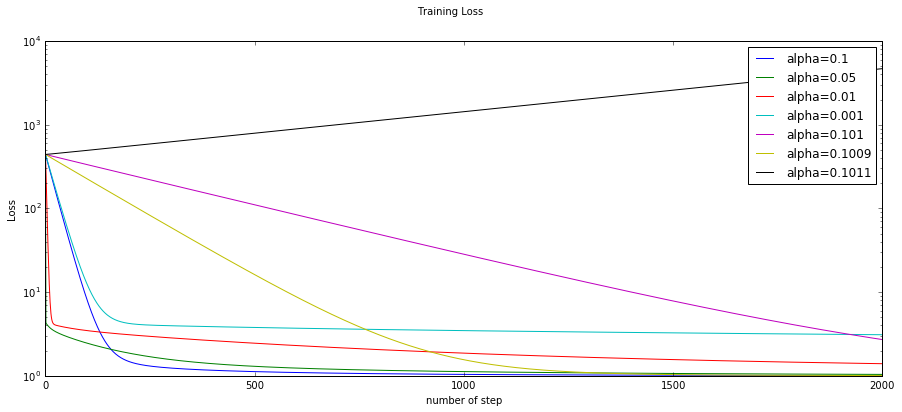

In [18]:
alpha = [0.1, 0.05, 0.01,0.001,0.1010,0.1009,0.1011]
fig = plt.figure(figsize = (15,6))
for i in range(len(alpha)):
    t, loss = batch_grad_descent(X_train, y_train, alpha = alpha[i], num_iter=2000, check_gradient=False)
    plt.plot(range(loss.shape[0]), loss, label = 'alpha=' + str(alpha[i]))
    plt.yscale('log')
fig.suptitle("Training Loss")
plt.xlabel("number of step")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/Users/twff/Downloads/machine learning/hw/hw1-sgd/image242')

From the figure1, we can see, among the different step sizes alpha=0.05 converges most quickly and alpha=0.1 has the lowest loss. When step size equals 0.01 and 0.001, it seems that the objective function converges to local minimum instead of global minimum and maybe it is due to the step size is too small. when the alpha comes to 0.1009, though function still converges to global minimum, but the rate of converge is pretty slow. After step size bigger than 0.1011, instead of converaging, the function seems to begin diverging.

In [19]:
def BacktrackingLineSearch(func, df, x, p, args = (), alpha = 0.0001, beta = 0.9, eps = 1,):

    step_size = 1.0
    fc = 0
    len_p = norm(p)


    while func(x + step_size * p, args) > f_x + alpha * step_size * theta:
        step_size *= beta
        fc += 1
        if Verbose: print 'linesearch iteration', fc, ':', stp, f(x + stp * p, *args), f_x + alpha * stp * theta
        if stp * len_p < eps:
            print 'Step is  too small'
            break
    return step_size


SyntaxError: invalid syntax (<ipython-input-19-bc027ccc7d2c>, line 29)

Summary:

In [20]:
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    grad = compute_square_loss_gradient(X, y, theta)
    grad = grad + 2 * lambda_reg * theta
    return grad

In [21]:
lambda_reg = 0.1
compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)

ValueError: shapes (200,48) and (49,) not aligned: 48 (dim 1) != 49 (dim 0)

In [22]:
def regularized_grad_descent(X, y, alpha=0.01, lambda_reg=0.01, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run 
        
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features) 
        loss_hist - the history of regularized loss value, 1D numpy array
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    for i in range(num_iter):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        theta_hist[i] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
        gradient = compute_square_loss_gradient(X, y, theta)
        gradient = gradient + 2 * lambda_reg * theta
        theta = theta - alpha * gradient  # update
    theta_hist[i+1,:] = theta
    loss_hist[i+1] = compute_square_loss(X, y, theta) + ((2 *lambda_reg) / X.shape[0])*sum(theta**2)
    return theta_hist, loss_hist
    

In [23]:
regularized_grad_descent(X_train, y_train, alpha=0.1, lambda_reg=1, num_iter=1000)

(array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
        [ -1.80701321e+00,  -1.75832650e+00,  -1.70505426e+00, ...,
          -8.85255853e-01,  -8.85255853e-01,  -1.82376814e+00],
        [  1.64930708e+00,   1.66679503e+00,   1.66364610e+00, ...,
           1.26971450e+00,   1.26971450e+00,   1.64485893e+00],
        ..., 
        [  2.68468051e+71,   2.65124808e+71,   2.60399796e+71, ...,
           1.72005129e+71,   1.72005129e+71,   2.69687633e+71],
        [ -3.16476989e+71,  -3.12535890e+71,  -3.06965924e+71, ...,
          -2.02764035e+71,  -2.02764035e+71,  -3.17914663e+71],
        [  3.73071151e+71,   3.68425282e+71,   3.61859265e+71, ...,
           2.39023418e+71,   2.39023418e+71,   3.74765918e+71]]),
 array([  4.41434261e+002,   6.12609449e+002,   8.48066033e+002, ...,
          1.79608926e+145,   2.49589881e+145,   3.47538584e+145]))

#### 2.5.4
When B is large enough, we can see the whole regulazation $$ as omaga(f)

#### 2.5.7

the minimum test loss is 1.220667675941963
the minimum train loss is 1.039074511634143


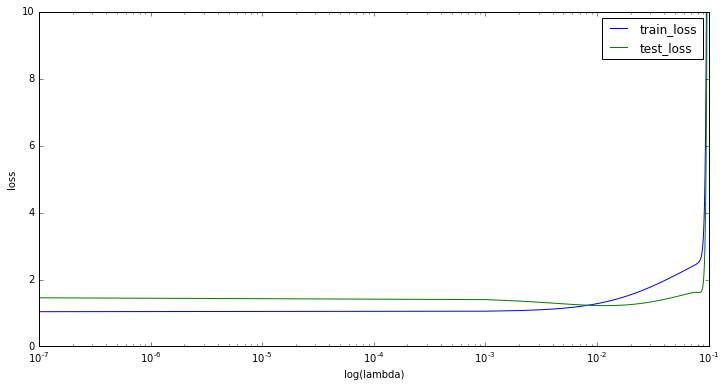

In [24]:
lamb = np.linspace(1e-7, 0.1, 100)
plt.figure(figsize = (12, 6))
J_train = np.zeros(len(lamb))
J_test = np.zeros(len(lamb))
thetas = np.zeros((len(lamb),X_train.shape[1]))
axes = plt.gca()
for i in range(len(lamb)):
    theta, _ = regularized_grad_descent(X_train, y_train, alpha=0.1, lambda_reg = lamb[i], num_iter=1000)
    thetas[i] = theta[-1]
    J_train[i] = compute_square_loss(X_train, y_train, thetas[i])
    J_test[i] = compute_square_loss(X_test, y_test, thetas[i])

print('the minimum test loss is {}'.format(min(J_test)))
print('the minimum train loss is {}'.format(min(J_train)))
plt.plot(lamb, J_train, label = 'train_loss')
plt.plot(lamb, J_test, label = 'test_loss')
plt.xscale('log')
plt.xlabel('log(lambda)')
plt.ylabel('loss')
axes.set_ylim([0,10])
plt.legend()
plt.savefig('/Users/twff/Downloads/machine learning/hw/hw1-sgd/image257')

lambda = 0.01

### 2.6 Stochastic Gradient Descent

#### 2.6.1


#### 2.6.2

In [25]:
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [26]:
import random
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    n = list(range(num_instances))
    start = timeit.default_timer()
    for epoch in np.arange(0, epoch):
        epoch_loss = []
        for (batchX, batchY) in next_batch(X, y, bacth_size):
            loss = compute_square_loss(batchX, batchy, theta)
            epoch_loss.append(loss)
            theta[]=theta
            if type(alpha) == float:
                eta = alpha
            elif alpha == "1/sqrt(t)":
                eta = 1 / np.sqrt(j)
            elif alpha == "1/t":
                eta == 1/j
            else:
                return
            gradient = compute_square_loss_gradient(X, y, theta)
            gradient = gradient + 2 * lambda_reg * theta
            theta = theta - eta * gradient
        loss_hist[epoch, ]
    
            
            
        
    #for i in range(0, num_iter):
     #   np.random.shuffle(n)
     #  for j in n:
    #     if type(alpha) == float:
         #       eta = alpha
        #    elif alpha == "1/sqrt(t)":
          #      eta = 1 / np.sqrt(j)
           # elif alpha == "1/t":
           #     eta == 1/j
            #else:
              #  return
           # theta_hist[i, j] = theta
            #loss_hist[i, j] = compute_square_loss(X, y, theta)
            #gradient = compute_square_loss_gradient(X, y, theta)
            #gradient = gradient + 2 * lambda_reg * theta
            #theta = theta - eta * gradient  # update
    #stop = timeit.default_timer()
    #print(stop - start)
    return theta_hist, loss_hist

SyntaxError: invalid syntax (<ipython-input-26-10cce7f9fb56>, line 32)

In [ ]:
import random
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
        time - the amount of time it takes on your computer for a single epoch of SGD
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    batchsize = 1
    time = []
    n = list(range(num_instances))
    
    for epoch in np.arange(0, num_iter):
        epoch_loss = []
        np.random.shuffle(n)
        start = timeit.default_timer()
        for i in np.arange(0, num_instances, batchsize):
            batchX = X[i:i + batchsize]
            batchy = y[i:i + batchsize]
            loss = compute_square_loss(batchX, batchy, theta)
            epoch_loss.append(loss)
            t = i/batchsize + 1
            theta_hist[epoch,t-1]=theta
            if type(alpha) == float:
                eta = alpha
            elif alpha == "1/sqrt(t)":
                eta = 1 / np.sqrt(t)
            else:
                eta = 1/t
            gradient = compute_square_loss_gradient(batchX, batchy, theta)
            gradient = gradient + 2 * lambda_reg * theta
            theta = theta - eta * gradient
        loss_hist.append(np.average(epoch_loss))
        stop = timeit.default_timer()
        time.append(stop - start)
    return theta_hist, loss_hist, time

In [27]:
import random
import timeit
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
        time - the amount of time it takes on your computer for a single epoch of SGD
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    batchsize = num_instances / num_iter
    time = []
    n = list(range(num_instances))
    for epoch in np.arange(0, num_iter):
        #epoch_loss = []
        np.random.shuffle(n)
        start = timeit.default_timer()
        for i in range(len(n)):
            loss = 0
            if type(alpha) == float:
                eta = alpha
            elif alpha == "1/sqrt(t)":
                eta = 0.1 / np.sqrt(i+1)
            else:
                eta = 0.1/(i+1)
            hypothesis = np.sum(X[n[i]] * theta)
            loss = hypothesis - y[n[i]]
            cost = loss*loss
            gradient = np.dot(X[n[i]], loss)
            gradient = gradient + 2 * lambda_reg * theta
            theta = theta - eta * gradient
            theta_hist[epoch,i] = theta
            loss_hist[epoch,n[i]] = cost
        stop = timeit.default_timer()
        time.append(stop - start)
    return theta_hist, loss_hist, time

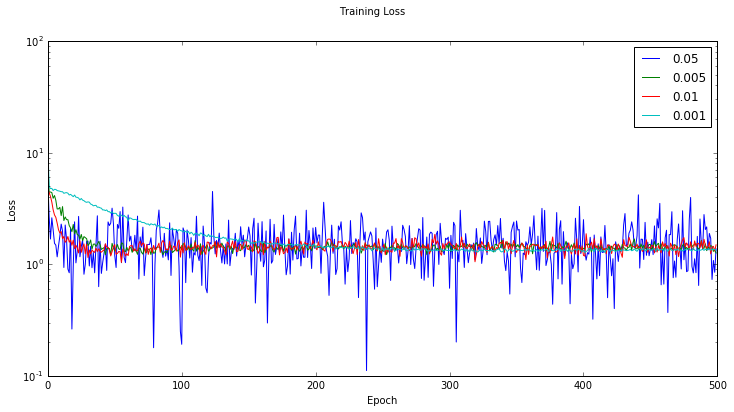

In [29]:


alpha = [0.05,0.005,0.01,0.001]
fig = plt.figure(figsize = (12,6))
axes = plt.gca()

for i in range(len(alpha)):
    theta, loss, time = stochastic_grad_descent(X_train, y_train, alpha=alpha[i], lambda_reg=0.01, num_iter=500)
    plt.plot(np.arange(0, 500),loss[:,-1], label = alpha[i])

fig.suptitle("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
#axes.set_ylim([0,10])
plt.yscale('log')
plt.legend()
plt.savefig('/Users/twff/Downloads/machine learning/hw/hw1-sgd/image2631')

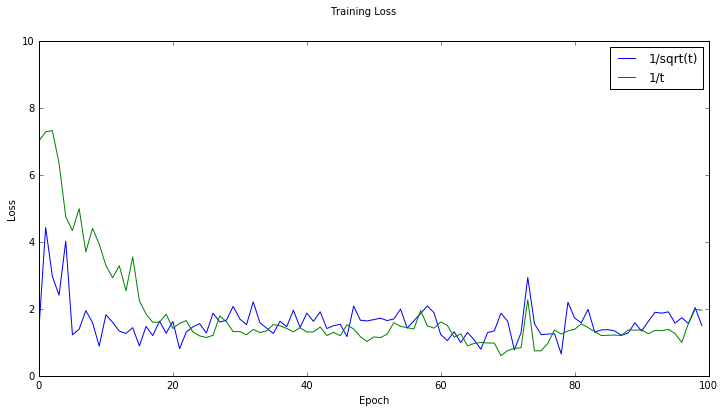

In [38]:
import timeit

fig = plt.figure(figsize = (12,6))
axes = plt.gca()

theta, loss, time = stochastic_grad_descent(X_train, y_train, alpha="1/sqrt(t)", lambda_reg=0.01, num_iter=100)
plt.plot(np.arange(0, 100),loss[:,-1], label = "1/sqrt(t)")
#print(loss)

theta, loss, time = stochastic_grad_descent(X_train, y_train, alpha="1/t", lambda_reg=0.01, num_iter=100)
plt.plot(np.arange(0, 100),loss[:,-1], label = "1/t")
#print(loss)

fig.suptitle("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.yscale('log')
axes.set_ylim([0,10])
plt.legend()
plt.savefig('/Users/twff/Downloads/machine learning/hw/hw1-sgd/image2632')

In [ ]:
np.average(time),max(time), min(time)